# TASK 1:

IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET

In [4]:
df=pd.read_csv("Customer_Churn.csv")

In [5]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.shape

(7043, 21)

In [8]:
Columns = df.columns

In [9]:
Columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
#Total Charges is also a numeric column but is not present in the above output which indicates "TotalCharges" clumn to be imputed.

In [13]:
#df['TotalCharges'] = df['TotalCharges'].astype(float) gave me the error ---->ValueError: could not convert string to float: ' '.
#This means that " " is treated as a string too.In order to treat " " as NaN ," " has to be replaced as NaN

#EXPLORATORY DATA ANALYSIS

In [15]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [16]:
df["TotalCharges"].isnull().sum()

11

In [17]:
#Imputing null values

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [19]:
df['TotalCharges'].dtype

dtype('float64')

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


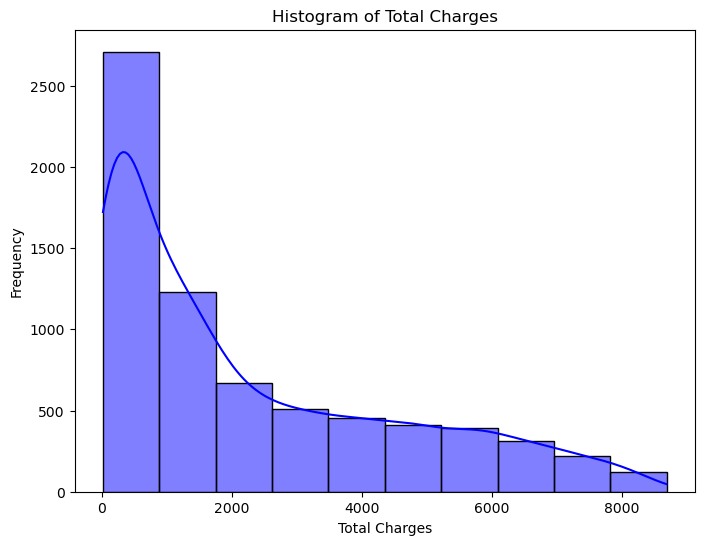

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], bins=10, kde=True, color='blue')
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

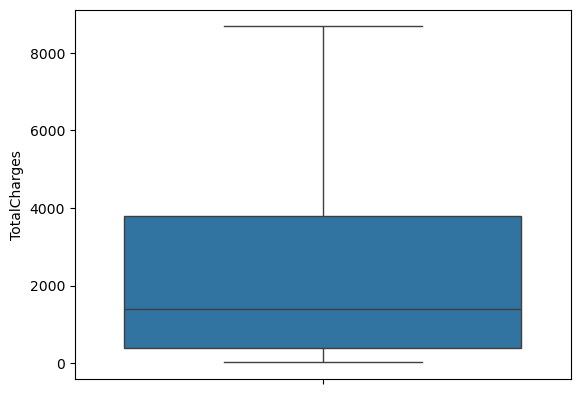

In [22]:
sns.boxplot(df['TotalCharges'])
plt.show()

In [23]:
#It is evident that the column 'TotalCharges' is left skewed and hence using mean to impute null values is not a good choice.Most of the values lie in the range 1-2000,therefore i would use median to impute them

In [24]:
median_totalcharges = df['TotalCharges'].median()

In [25]:
median_totalcharges

1397.475

In [26]:
df["TotalCharges"].fillna(median_totalcharges, inplace=True)

C:\Users\Akshara Anil\AppData\Local\Temp\ipykernel_28568\3431068333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(median_totalcharges, inplace=True)


In [27]:
null_count_totalcharges = df['TotalCharges'].isnull().sum()

In [28]:
null_count_totalcharges

0

In [29]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
#Checking for duplicate values
df.duplicated().sum()

0

# TASK 2

VISUALIZATION PLOT

In [32]:
#1Overall Churn Rate: Visualize the proportion of customers who churned vs those who stayed

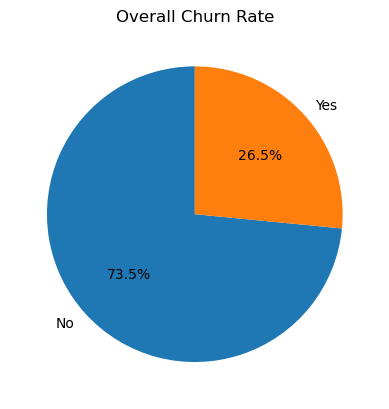

In [33]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct = '%1.1f%%',startangle = 90)
plt.title("Overall Churn Rate")
plt.show()

In [34]:
#2Churn by Demograpics: Compare churn rates across categories like gender, senior citizen status ,partner status.

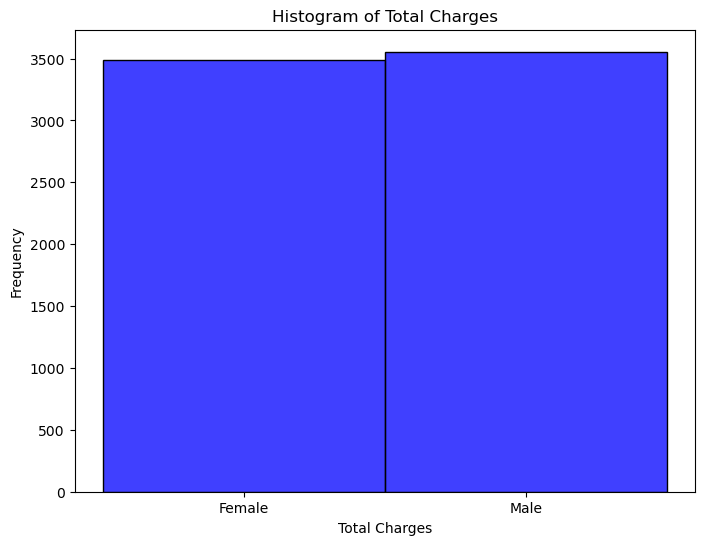

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df['gender'], bins=10, color='blue')
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

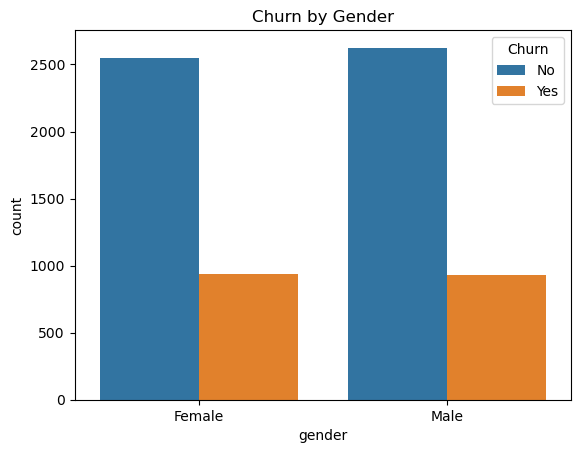

In [36]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

In [37]:
#There are almost equal number of male and female customers in the dataset and almost equal proportion of each churned.

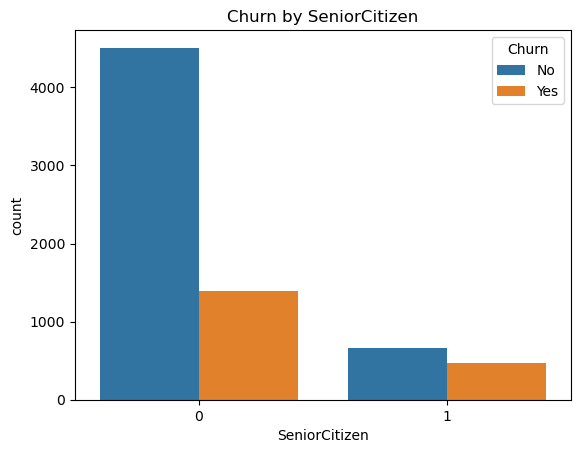

In [38]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by SeniorCitizen')
plt.show()

In [39]:
#This suggests that most of the customers who churned belongs to younger sections and that only a lesser number of senior citizens churn. 

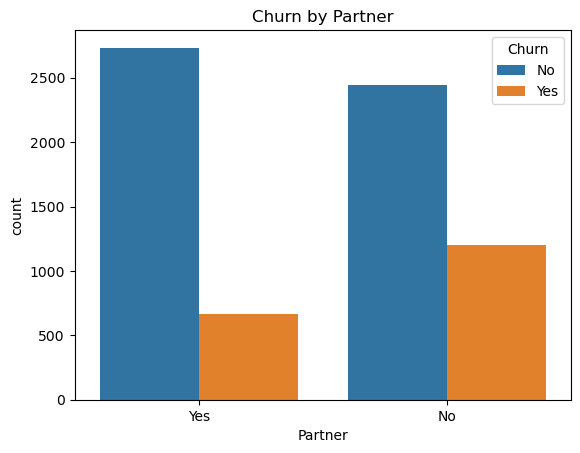

In [40]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partner')
plt.show()

In [41]:
#Analysing if most of the customers who churned are old customers or new customers

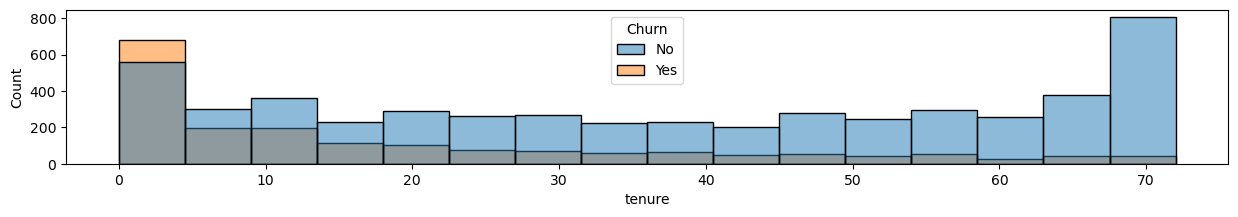

In [42]:
plt.figure(figsize=(15,2))
sns.histplot(data=df, x = 'tenure',hue='Churn')
plt.show()

In [43]:
#This tells that the customers who churned are all new customers mostly in the tenure range 0-5years.Most of the company's customers for 70 months.Therefore,better services shall be given to newer customers so as to ruduce newer customers from churning.

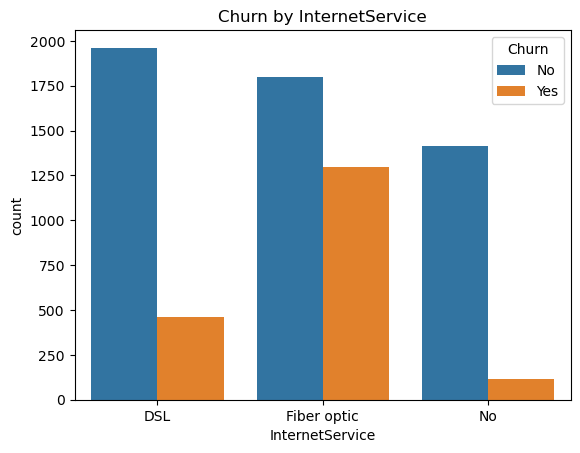

In [44]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by InternetService')
plt.show()

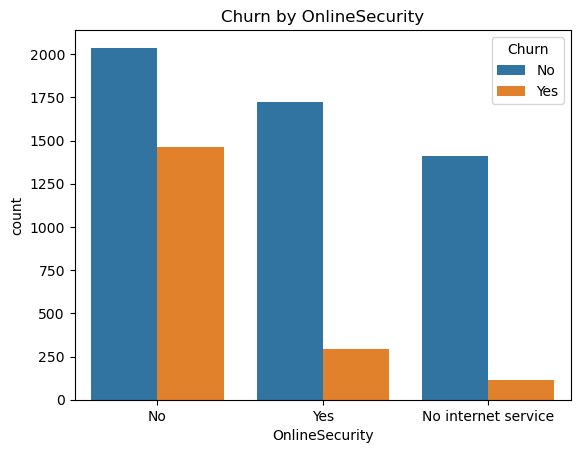

In [45]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by OnlineSecurity')
plt.show()

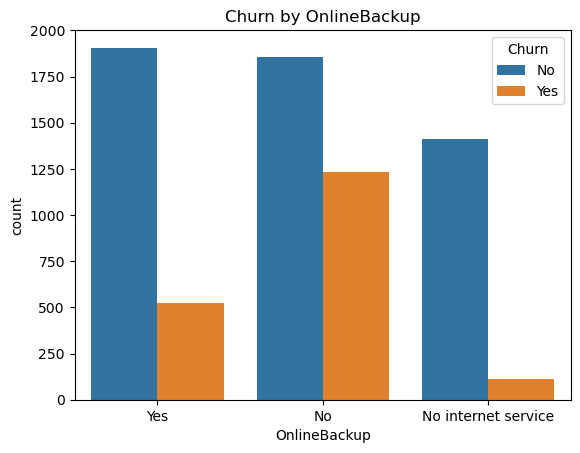

In [46]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn by OnlineBackup')
plt.show()

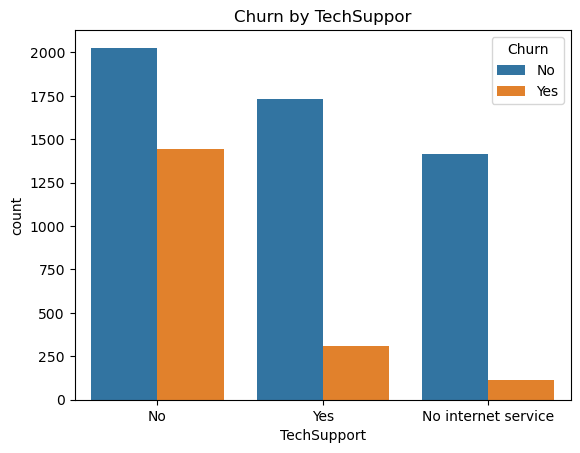

In [47]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by TechSuppor')
plt.show()

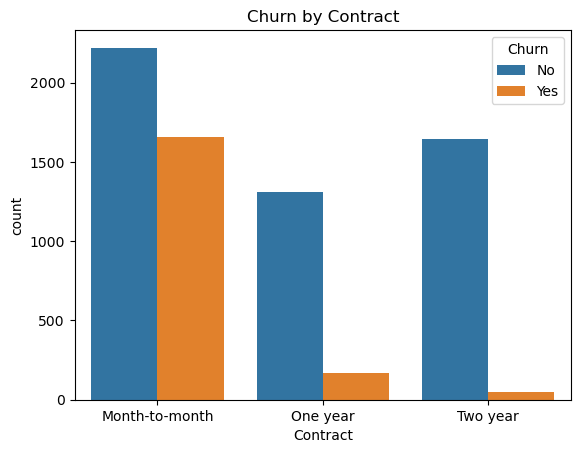

In [48]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract')
plt.show()

In [49]:
df = df.drop(['customerID'],axis =1)

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#CATEGORICAL ENCODING

In [52]:
#Separating cetorical and numerical columns
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)


In [53]:
# Function to Impute the missing values
def missing_value_imputation(dataset, numerical, categorical):
    for i in numerical:
        df[i] = df[i].fillna(df[i].median())
    for i in categorical:
        df[i] = df[i].fillna(df[i].mode()[0])
    return dataset

df = missing_value_imputation(df, numerical, categorical)

In [54]:
from sklearn.preprocessing import StandardScaler

def encoding(dataset, categorical):
    for i in categorical:
        df[i] = df[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

df = encoding(df, categorical)

In [55]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


#CORRELATION PLOT

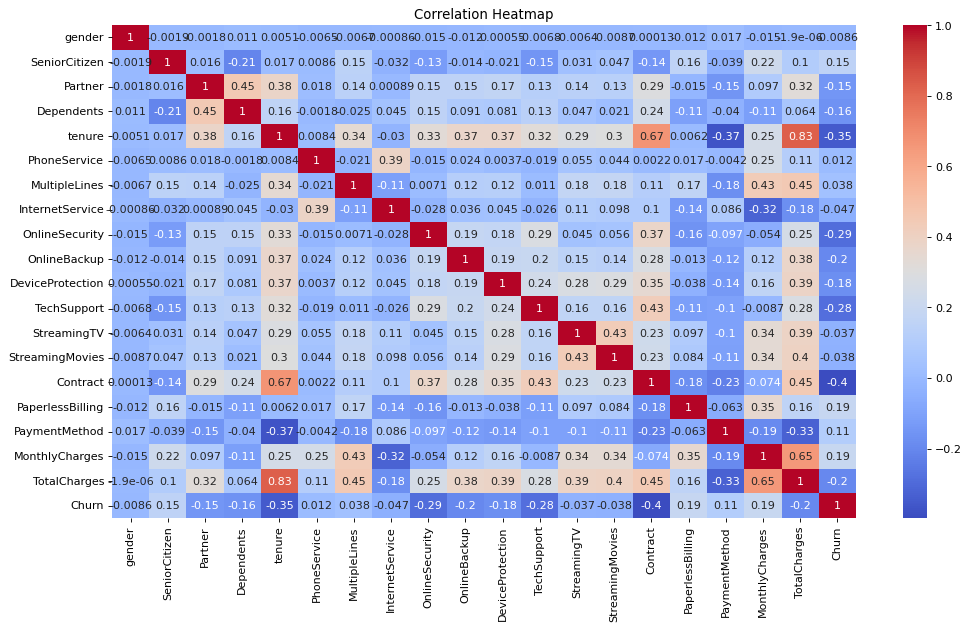

In [57]:
plt.figure(figsize=(15,8), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the above correlation metrics ,it can be infered that the columns 'Techsupport','Tenure' 'Contract' have an effect on "Churn" (Target column).Though not direct,'TotalCharges' and 'Contract' has a high correlation on 'Tenure'.

# TASK 3

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int8   
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int8   
 3   Dependents        7043 non-null   int8   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int8   
 6   MultipleLines     7043 non-null   int8   
 7   InternetService   7043 non-null   int8   
 8   OnlineSecurity    7043 non-null   int8   
 9   OnlineBackup      7043 non-null   int8   
 10  DeviceProtection  7043 non-null   int8   
 11  TechSupport       7043 non-null   int8   
 12  StreamingTV       7043 non-null   int8   
 13  StreamingMovies   7043 non-null   int8   
 14  Contract          7043 non-null   int8   
 15  PaperlessBilling  7043 non-null   int8   
 16  PaymentMethod     7043 non-null   int8   


ELBOW METHOD(optimal no of k)

In [62]:
wcss = []    #Within Cluster Sum of Squares

In [66]:
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init= 'k-means++',random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

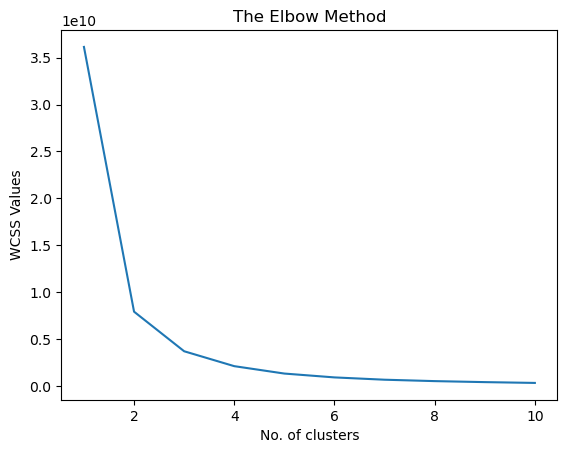

In [68]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

In [80]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(df_scaled)

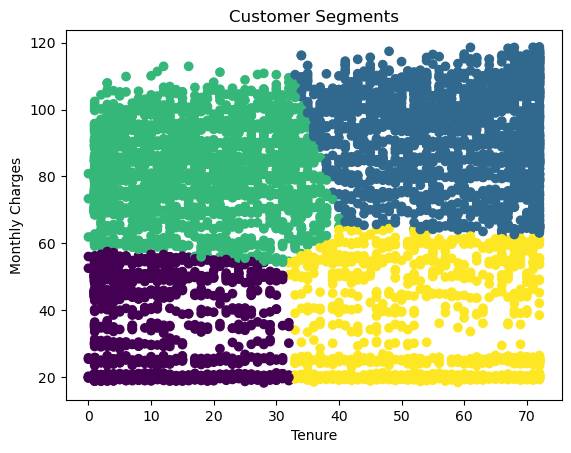

In [82]:
import matplotlib.pyplot as plt
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['Segment'], cmap='viridis')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer Segments')
plt.show()  

In [84]:
#Churn Rate per Segment
churn_rate = df.groupby('Segment')['Churn'].mean()
print(churn_rate)

Segment
0    0.246806
1    0.156250
2    0.489391
3    0.047660
Name: Churn, dtype: float64


Churn rates are highest in Segment 2 which is 49% .ie Segment 2 needs to given attention since half o fthe churn rate occureed here

Defing High Value Customers

In [99]:
mean_monthlycharges = df['MonthlyCharges'].mean()

In [101]:
mean_monthlycharges

64.76169246059918

In [105]:
high_value_customers = df[(df['MonthlyCharges'] > mean_monthlycharges) & (df['tenure'] > 12)]


In [113]:
#focussing on high value customers who churned
high_value_churners = high_value_customers[high_value_customers['Churn'] == 1]
print(high_value_churners)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
8          0              0        1           0      28             1   
13         1              0        0           0      49             1   
26         1              0        1           1      47             1   
38         1              0        0           0      34             1   
51         0              0        0           0      15             1   
...      ...            ...      ...         ...     ...           ...   
6993       0              1        1           0      50             1   
6996       0              0        1           1      41             1   
7006       1              0        0           0      40             1   
7009       1              0        0           0      23             1   
7034       0              0        0           0      67             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
8                 2                1

Visualize Segments by Two Key Features

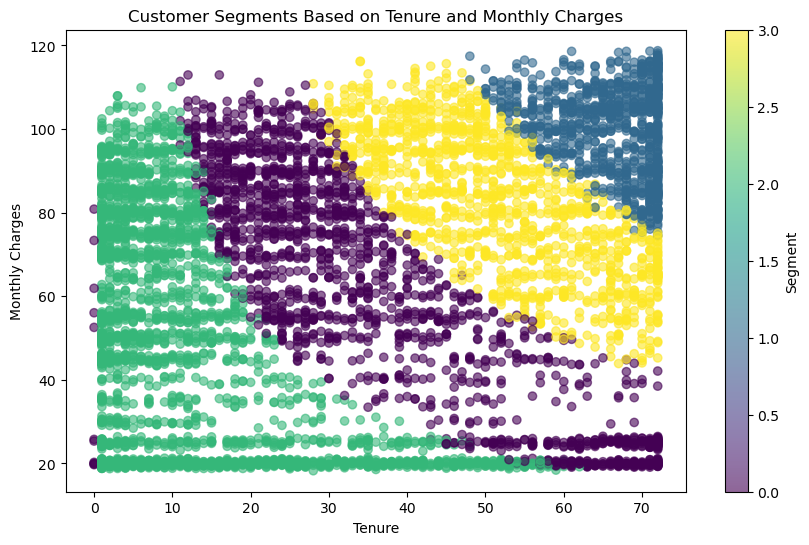

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['Segment'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Segment')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer Segments Based on Tenure and Monthly Charges')
plt.show()

Average Metrics for Each Segment

<Figure size 1000x600 with 0 Axes>

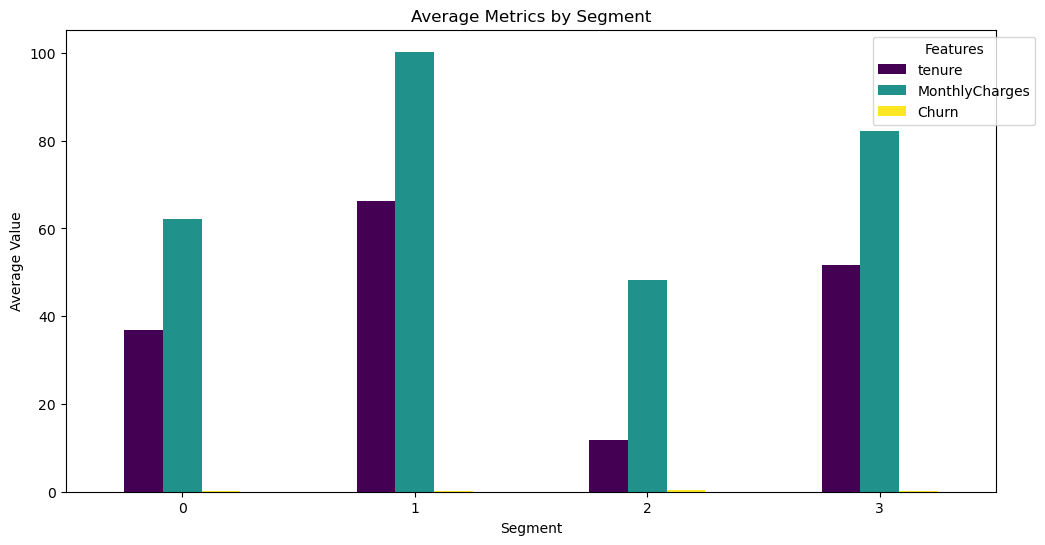

In [125]:
segment_summary = df.groupby('Segment')[['tenure', 'MonthlyCharges', 'Churn']].mean().reset_index()


plt.figure(figsize=(10, 6))
segment_summary.plot(x='Segment', kind='bar', figsize=(12, 6), rot=0, colormap='viridis')
plt.title('Average Metrics by Segment')
plt.ylabel('Average Value')
plt.xlabel('Segment')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1))
plt.show()

Proportion of Customers in Each Segment

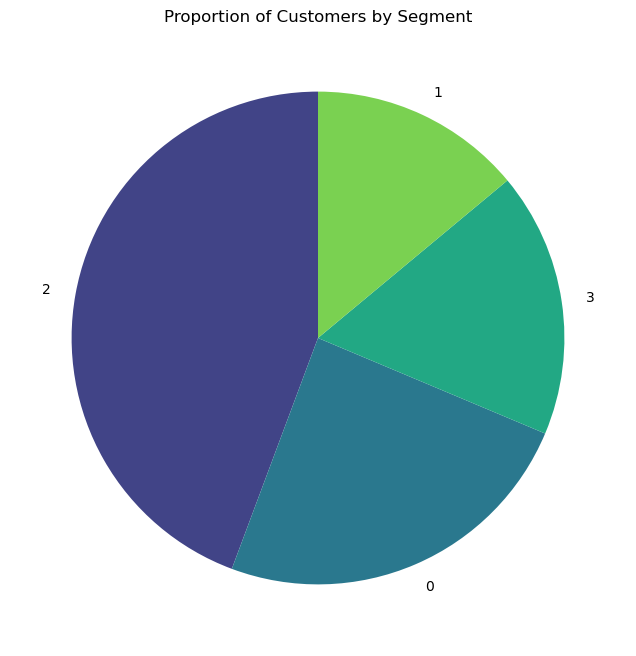

In [127]:
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, startangle=90, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Proportion of Customers by Segment')
plt.show()

Churn Rate by Segment

C:\Users\Akshara Anil\AppData\Local\Temp\ipykernel_28568\1726163959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Churn', data=churn_rate, palette='viridis')


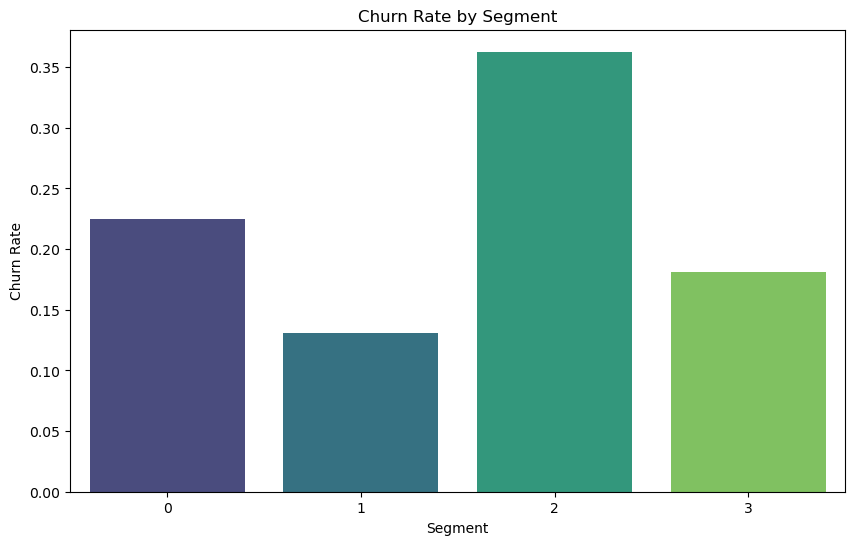

In [129]:
churn_rate = df.groupby('Segment')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Churn', data=churn_rate, palette='viridis')
plt.title('Churn Rate by Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Segment')
plt.show()

# TASK 4 + TASK 5:

In [131]:
from sklearn.model_selection import train_test_split


In [133]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [139]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [141]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 

C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
 results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

In [145]:
results_df = pd.DataFrame(results).T
print(results_df)

               Accuracy  Precision    Recall  F1-Score
Random Forest  0.803407   0.679104  0.487936  0.567863


In [147]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

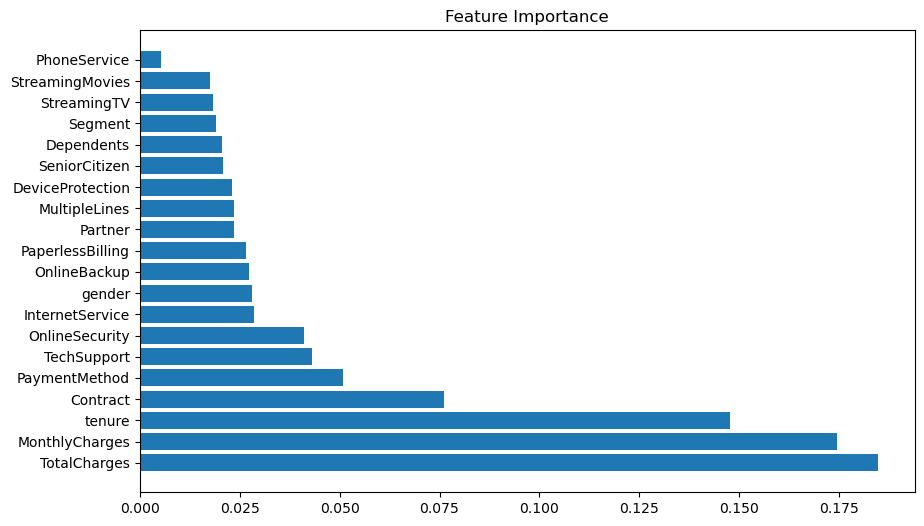

In [149]:
importance = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importance[indices])
plt.title("Feature Importance")
plt.show()

In [151]:
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [157]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1', 
    cv=3,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [158]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [159]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("F1-Score:", f1_score(y_test, y_pred))


F1-Score: 0.5828220858895705


In [163]:
best_model = RandomForestClassifier(class_weight='balanced', random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [165]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
best_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [167]:
X['LogMonthlyCharges'] = np.log1p(X['MonthlyCharges'])

In [175]:
pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 777.7 kB/s eta 0:02:41
   ---------------------------------------- 0.1/124.9 MB 762.6 kB/s eta 0:02:44
   ---------------------------------------- 0.2/124.9 MB 833.5 kB/s eta 0:02:30
   ---------------------------------------- 0.2/124.9 MB 980.4 kB/s eta 0:02:08
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:57
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:48
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.6/124.9 MB 1.3 MB/s eta 0:01:35
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta

In [176]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [179]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf

In [181]:
y_pred = best_model.predict(X_test)

print("F1-Score:", f1_score(y_test, y_pred))


F1-Score: 0.5828220858895705


# CONFUSION MATRICS

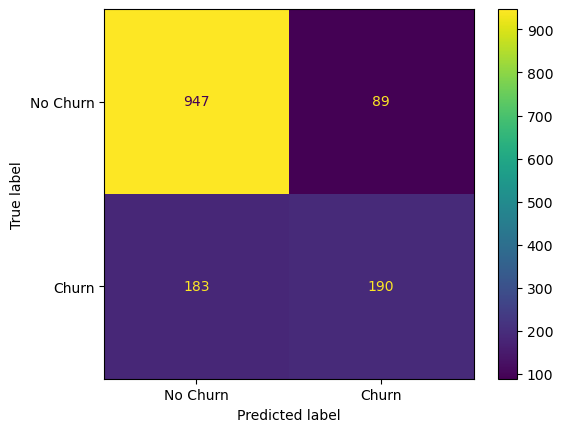

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"]).plot()

In [185]:
importance = best_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance
4             tenure    0.158379
18      TotalCharges    0.147351
17    MonthlyCharges    0.134778
14          Contract    0.133143
11       TechSupport    0.071941
8     OnlineSecurity    0.065995
7    InternetService    0.048291
16     PaymentMethod    0.038779
9       OnlineBackup    0.032105
15  PaperlessBilling    0.022933
10  DeviceProtection    0.020826
6      MultipleLines    0.018829
19           Segment    0.017310
0             gender    0.015137
13   StreamingMovies    0.014404
12       StreamingTV    0.013821
2            Partner    0.013685
1      SeniorCitizen    0.013601
3         Dependents    0.013465
5       PhoneService    0.005225


In [ ]:
# Plot feature importance

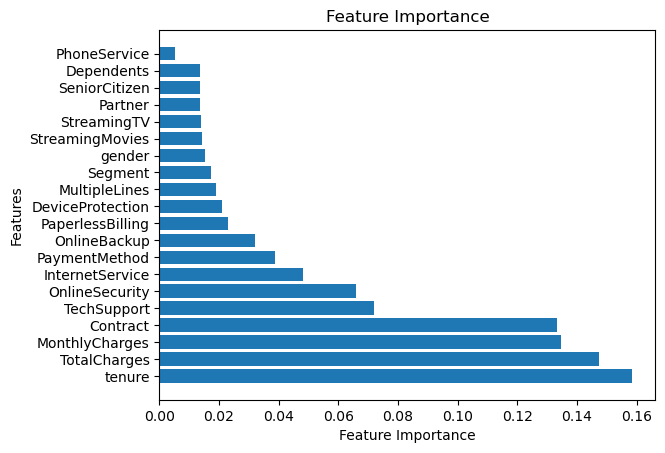

In [187]:
import matplotlib.pyplot as plt
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = best_model.predict_proba(X_test)[:, 1] 

# ROC CURVE

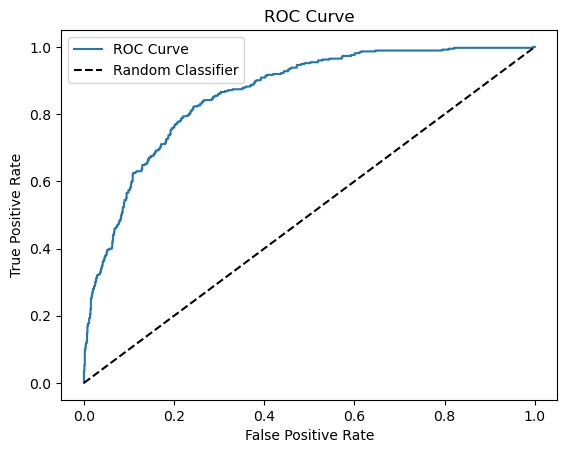

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC

In [205]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc:.2f}")

AUC: 0.86


# TASK 6